In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasmine163","key":"165d6d8f52f1caf72e13a9cd13f7178c"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07          10316        244  1.0              
shiivvvaam/top-youtuber-worldwide                                  Top YouTubers Worldwide                             83KB  2024-02-05 09:33:23            590         34  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          15762        269  1.0              
saketk511/2019-2024-us-stock-market-data          

In [ ]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

 96% 170M/178M [00:00<00:00, 238MB/s]
100% 178M/178M [00:00<00:00, 213MB/s]


In [ ]:
!unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/online-payment-fraud-detection.zip")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df = df.drop(columns=['nameOrig','nameDest'])

<Axes: >

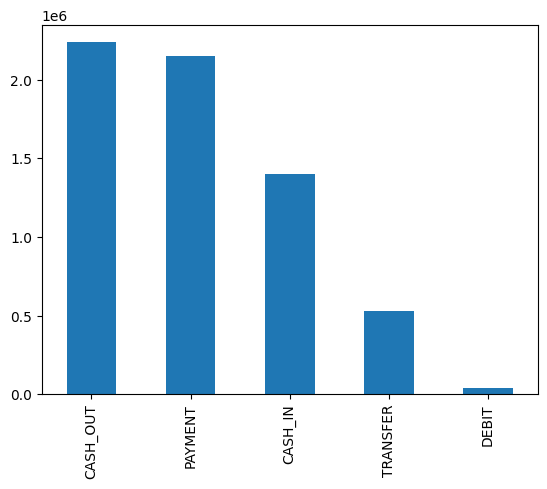

In [ ]:
df.type.value_counts().plot(kind='bar')

<ipython-input-17-fbed9be41856>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


[Text(0, 0, 'PAYMENT'),
 Text(1, 0, 'TRANSFER'),
 Text(2, 0, 'CASH_OUT'),
 Text(3, 0, 'DEBIT'),
 Text(4, 0, 'CASH_IN')]

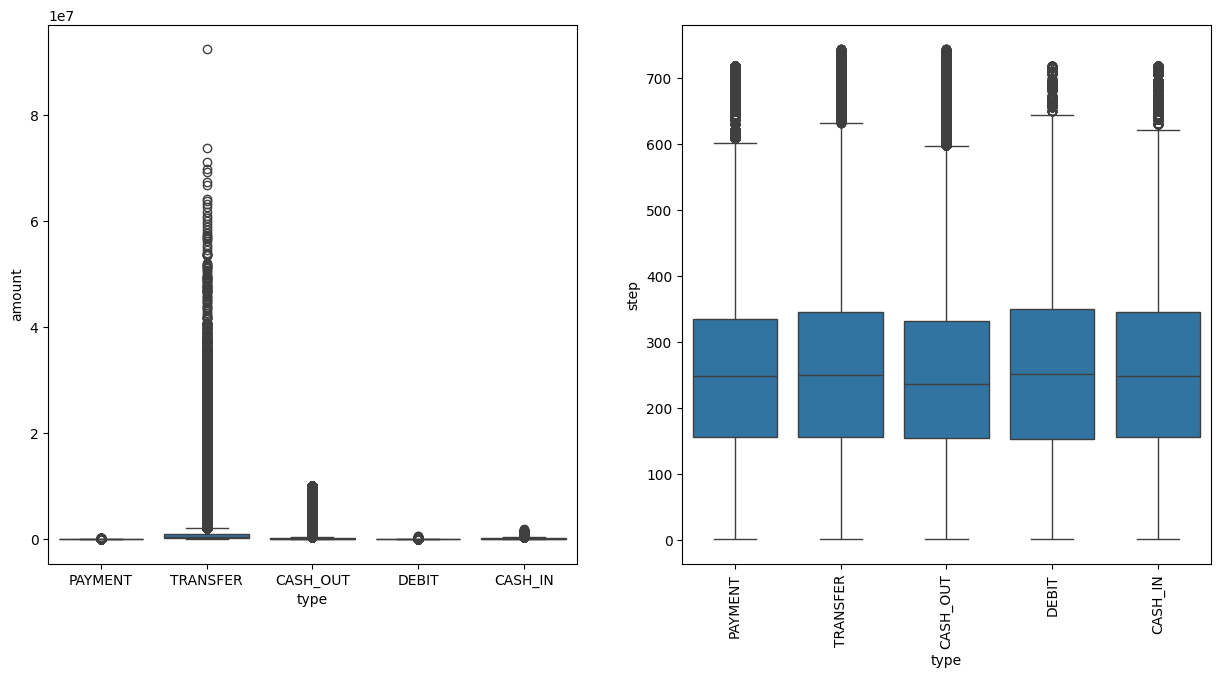

In [ ]:
f, ax = plt.subplots(figsize = (15,7), nrows = 1, ncols =2 )
sns.boxplot(data = df, x= 'type', y='amount', ax=ax[0])
sns.boxplot(data = df, x= 'type', y='step', ax = ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

<Axes: xlabel='type', ylabel='amount'>

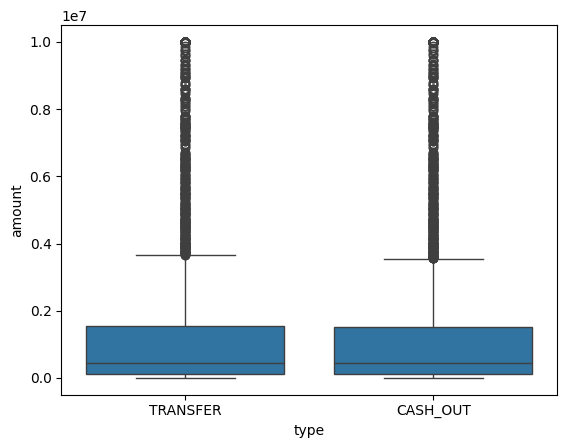

In [ ]:
fraud_payments = df[df['isFraud'] == 1]
sns.boxplot(fraud_payments, x='type',y='amount')

Number of fraudulent Transfer transactions: 4097 and number of CASH OUT transactions: 4116


<Axes: >

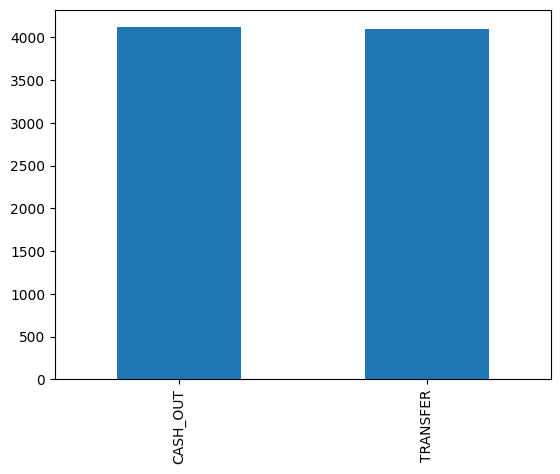

In [ ]:
print('Number of fraudulent Transfer transactions:',fraud_payments.type.value_counts()[1],'and number of CASH OUT transactions:', fraud_payments.type.value_counts()[0])
fraud_payments.type.value_counts().plot(kind='bar')

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [ ]:
y= df.isFraud
X = df.copy()
X=X.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [ ]:
print('imbalanced training dataset:\n',y_train.value_counts())

imbalanced training dataset:
 0    5083526
1       6570
Name: isFraud, dtype: int64


In [ ]:
df_train = pd.concat([X_train,y_train], axis = 1)

num_zero, num_one = df_train.isFraud.value_counts()
df_fraud = df_train[df_train['isFraud']==1]
df_nonfraud = df_train[df_train['isFraud']==0]

df_nonfraud = df_nonfraud.sample(n=num_one, replace=False)
df_train_balanced = pd.concat([df_fraud,df_nonfraud], axis = 0)

X_train = df_train_balanced.drop(columns=['isFraud'])
y_train = df_train_balanced.isFraud

<Axes: >

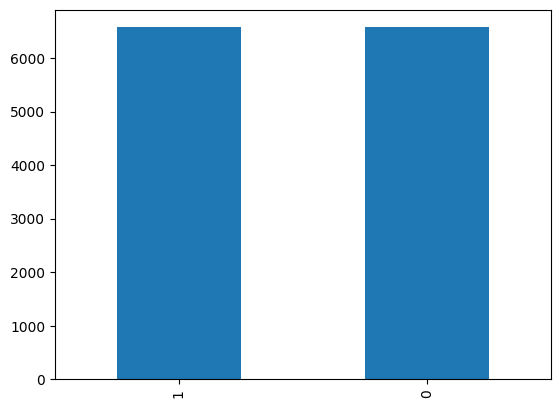

In [ ]:
y_train.value_counts().plot(kind = 'bar') # balanced dataset

In [ ]:
%%time

rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,8],
             'min_samples_leaf': [1,2,3,7],
             'min_samples_split': [2,3,4,8],
             'max_features': [2,3,4,8],
             'n_estimators': [75, 100, 125]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')
rf_cv = RandomizedSearchCV(rf, cv_params, n_iter=150, scoring = scoring, cv = 5, refit= 'f1')

rf_cv.fit(X_train, y_train)

CPU times: user 11min 37s, sys: 1.28 s, total: 11min 38s
Wall time: 11min 47s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=150,
                   param_distributions={'max_depth': [2, 3, 4, 8],
                                        'max_features': [2, 3, 4, 8],
                                        'min_samples_leaf': [1, 2, 3, 7],
                                        'min_samples_split': [2, 3, 4, 8],
                                        'n_estimators': [75, 100, 125]},
                   refit='f1',
                   scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
%%time
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {'max_depth': [4,5,6,7,8],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.05,0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]  # number of trees
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = RandomizedSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1',n_iter=50)


xgb_cv.fit(X_train, y_train)

CPU times: user 1min 57s, sys: 820 ms, total: 1min 58s
Wall time: 1min 19s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [75, 100, 125]},
                   refit='f1',
                   scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
def evaluation(true_value, prediction, model_name):
    f1 = f1_score(true_value, prediction)
    recall =recall_score(true_value, prediction)
    precision = precision_score(true_value, prediction)
    accuracy = accuracy_score(true_value, prediction)

     # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )

    return table

In [ ]:
prediction_rf = rf_cv.predict(X_test)
prediction_xgb = xgb_cv.predict(X_test)
table_rf = evaluation(y_test, prediction_rf, 'Random Forest')
table_xgb = evaluation(y_test, prediction_xgb, 'XgBoost')

results = pd.concat([table_rf,table_xgb])

<ipython-input-27-9b538efa22fd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,
<ipython-input-27-9b538efa22fd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [ ]:
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.142720,0.995131,0.076872,0.984565
0,XgBoost,0.221289,0.994522,0.124495,0.990963


In [ ]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot()
    plt.show()

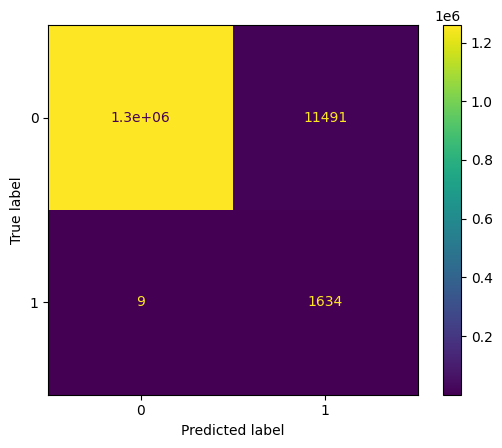

In [ ]:
conf_matrix_plot(xgb_cv, X_test, y_test)

In [ ]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(xgb_cv, file)

In [ ]:
import pandas as pd

In [ ]:
# Create a dictionary with the feature values for the new data
new_data = {
    'step': [1],
    # Replace value1 with the step value for the new data
    # Replace 0 or 1 based on whether this type is present in the new data
    'amount': [],  # Replace value2 with the amount for the new data
    'oldbalanceOrg': [41554.0],  # Replace value3 with the old balance for the new data
    'newbalanceOrig': [29885.86],  # Replace value4 with the new balance for the new data
    'oldbalanceDest': [0.0],  # Replace value5 with the old balance destination for the new data
    'newbalanceDest': [0.0] ,
    'isFlaggedFraud': [0],
    'type_CASH_OUT': [0],
      # Replace 0 or 1 based on whether this type is present in the new data

    'type_DEBIT': [0],
    'type_PAYMENT': [1],
    'type_TRANSFER': [0],# Replace value6 with the new balance destination for the new data
}

# Create a DataFrame from the dictionary
new_data_df = pd.DataFrame(new_data)



# Predictions using XGBoost model
xgb_prediction = xgb_cv.predict(new_data_df)


print("XGBoost Prediction:", xgb_prediction)